### Image Classification Using Deep Learning

### Import Tools

In [1]:
import keras
from keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation
from keras.layers import Conv2D,MaxPooling2D,GlobalMaxPooling2D,BatchNormalization
from sklearn.metrics import confusion_matrix
import seaborn as sns

### Setting Constant

In [2]:
batch_size=32#Divide dataset into 32 batches
num_classes=10
data_augmentation=True

### The data, shuffled and split between train and test

In [3]:
# The data, shuffled and split between train and test
(x_train,y_train),(x_test,y_test)= cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
#convert class vectors to binary class metrics
y_train =keras.utils.to_categorical(y_train,num_classes)
y_test =keras.utils.to_categorical(y_test,num_classes)

In [6]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

### Showing Images

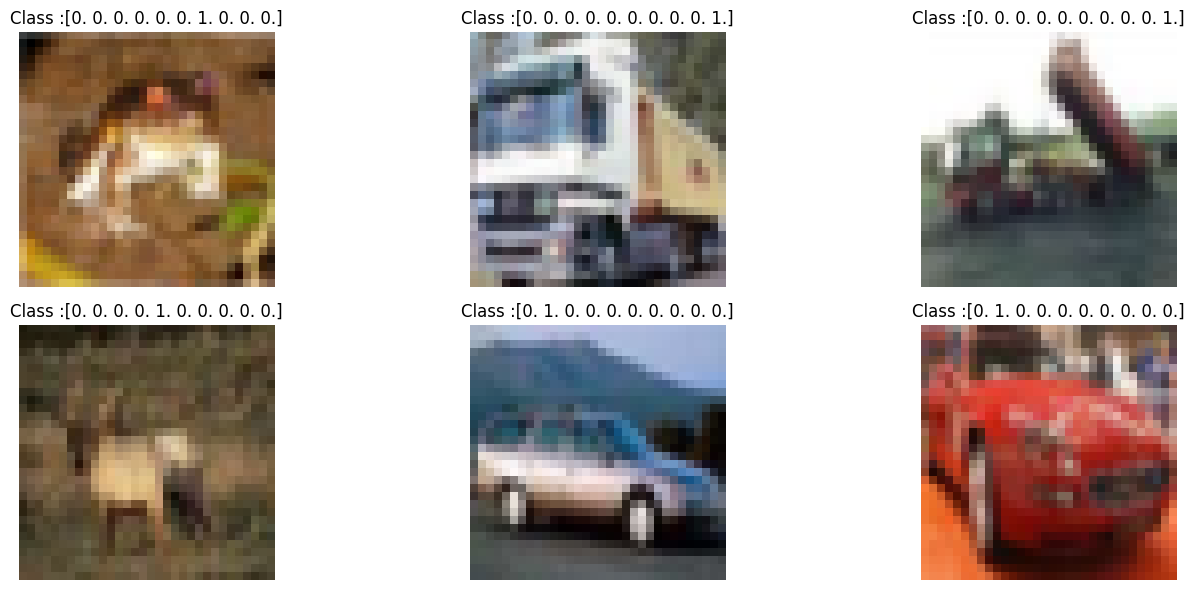

In [7]:
import matplotlib.pyplot as plt
fig,axes =plt.subplots(2,3,figsize=(15,6))
axes = axes.flatten()
for i in range(2*3):
    axes[i].imshow(x_train[i])
    axes[i].axis('off')
    axes[i].set_title(f"Class :{y_train[i]}")
plt.tight_layout()
plt.show()


### Feature Scaling

In [8]:
x_train = x_train.astype("float")
x_test = x_test.astype("float")

x_train /= 255
x_test /= 255

### Model Architecture

In [9]:
#x_train.shape[1:]

In [10]:
model = Sequential()
#Convolution layer with 32 filters, each of size 3x3
model.add(Conv2D(32,(3,3),kernel_initializer='random_uniform',input_shape=x_train.shape[1:]))
#ReLU activation function
model.add(Activation('relu'))
#Batch Normalization layer
model.add(BatchNormalization())


model.add(Conv2D(32,(3,3),kernel_initializer='random_uniform',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(32,(3,3),kernel_initializer='random_uniform',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(48,(3,3),kernel_initializer='random_uniform',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(48,(3,3),kernel_initializer='random_uniform',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(48,(3,3),kernel_initializer='random_uniform',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3),kernel_initializer='random_uniform',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(128,(3,3),kernel_initializer='random_uniform',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

#Global max Pooling Layer
model.add(GlobalMaxPooling2D())
#Dropout layer with dropout rate of 0.25
model.add(Dropout(0.25))

#fully connected layer with number of units equal to number of classes
model.add(Dense(num_classes))
#softmax activation function for multi-class classification
model.add(Activation('softmax'))

model.summary()


d:\myprojects\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 48)     │        13,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 24, 24, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 48)     │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 22, 22, 48)     │        20,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 22, 22, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 22, 22, 48)     │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 20, 20, 48)     │        20,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 20, 20, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 20, 20, 48)     │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 18, 18, 64)     │        27,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 18, 18, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 179,418 (700.85 KB)

 Trainable params: 178,554 (697.48 KB)

 Non-trainable params: 864 (3.38 KB)

### Model Compilation and Training

In [11]:
opt=keras.optimizers.Adamax(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [13]:
history = model.fit(x_train,y_train,batch_size=500,epochs=30,validation_data=(x_test,y_test),shuffle=True)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 346s 3s/step - accuracy: 0.4373 - loss: 1.6389 - val_accuracy: 0.3776 - val_loss: 1.7414
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 353s 4s/step - accuracy: 0.4794 - loss: 1.5139 - val_accuracy: 0.4840 - val_loss: 1.4464
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 347s 3s/step - accuracy: 0.4962 - loss: 1.4650 - val_accuracy: 0.5450 - val_loss: 1.2746
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 353s 4s/step - accuracy: 0.5291 - loss: 1.3706 - val_accuracy: 0.5490 - val_loss: 1.2705
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 371s 4s/step - accuracy: 0.5486 - loss: 1.3201 - val_accuracy: 0.5286 - val_loss: 1.3239
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 361s 4s/step - accuracy: 0.5667 - loss: 1.2462 - val_accuracy: 0.5827 - val_loss: 1.1975
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 368s 4s/step - accuracy: 0.5875 - loss: 1.1906 - val_accuracy: 0.5932 - val_loss: 1.1593
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 348s 3s/step - accuracy: 0.6014 - loss: 1.1549 - val_accu

### Save the Model

In [14]:
model.save("cifar_model.h5")

### Training and Validation Loss

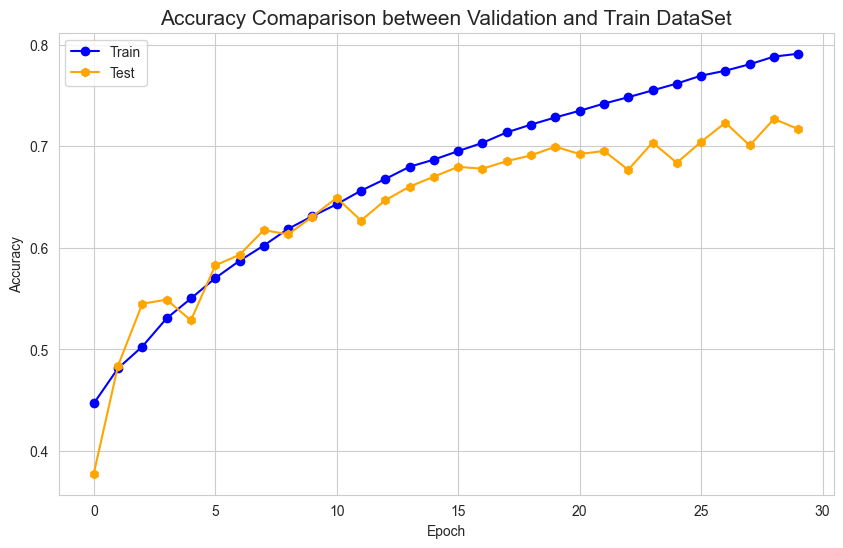

In [15]:
import seaborn as sb
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(history.history['accuracy'],color="blue",marker='o')
plt.plot(history.history['val_accuracy'],color="orange",marker='h')
plt.title("Accuracy Comaparison between Validation and Train DataSet",fontsize=15)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train','Test'],loc='best')
plt.show()


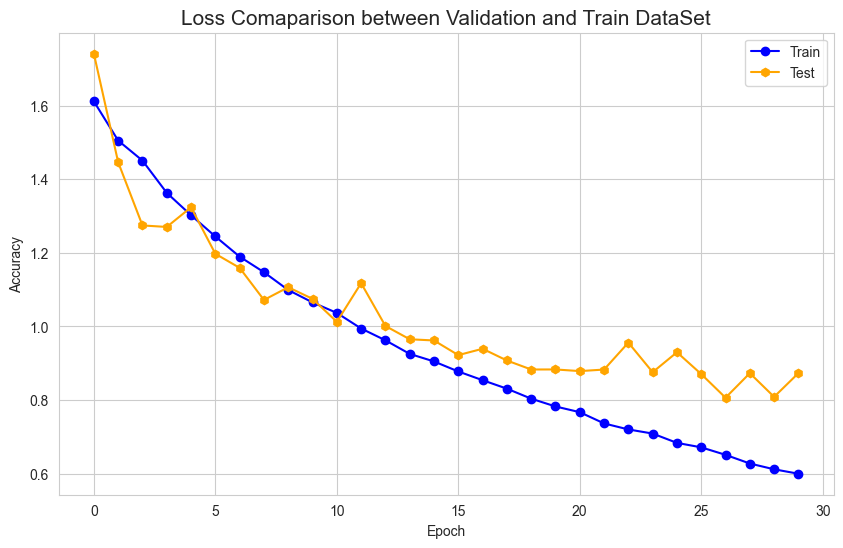

In [16]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(history.history['loss'],color="blue",marker='o')
plt.plot(history.history['val_loss'],color="orange",marker='h')
plt.title("Loss Comaparison between Validation and Train DataSet",fontsize=15)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train','Test'],loc='best')
plt.show()

### Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step


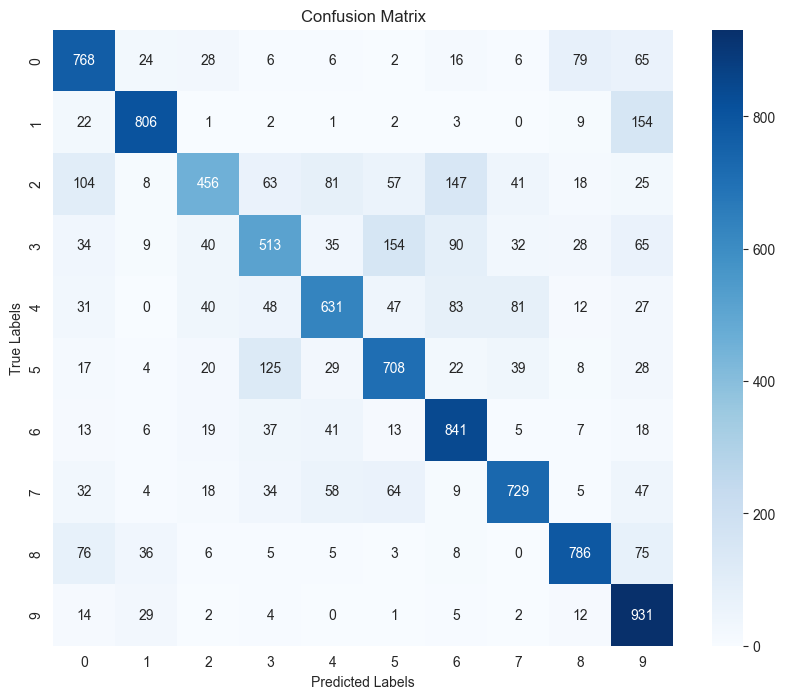

In [17]:
#prediction on the test data and store them in y_pred
y_pred = model.predict(x_test)
#calculate the confusion matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1))
#plot the confusion matrix as heatmap
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix,annot=True,cmap="Blues",fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [19]:
#Classification Report
from sklearn.metrics import classification_report
class_report = classification_report(y_test.argmax(axis=1),y_pred.argmax(axis=1))
#print the classification report
print("Classification Report")
print(class_report)


Classification Report
              precision    recall  f1-score   support

           0       0.69      0.77      0.73      1000
           1       0.87      0.81      0.84      1000
           2       0.72      0.46      0.56      1000
           3       0.61      0.51      0.56      1000
           4       0.71      0.63      0.67      1000
           5       0.67      0.71      0.69      1000
           6       0.69      0.84      0.76      1000
           7       0.78      0.73      0.75      1000
           8       0.82      0.79      0.80      1000
           9       0.65      0.93      0.76      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.71     10000
weighted avg       0.72      0.72      0.71     10000



### predictive System

In [20]:
#load the saved model
from keras.models import load_model
loaded_model=load_model("cifar_model.h5")

In [21]:
import numpy as np
import random

def predict():
    index = random.randint(0,len(x_test)-1)
    image= x_test[index]
    actual_label=y_test[index]
    predictions=loaded_model.predict(np.expand_dims(image,axis=0))
    predicted_label = np.argmax(predictions)
    #Define Class names
    class_names =['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

    # plot image
    plt.figure(figsize=(3,3))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"actual : {class_names[np.argmax(actual_label)]}, predicted:{class_names[predicted_label]}")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


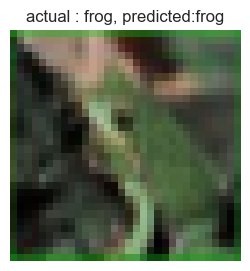

In [22]:
predict()